In [8]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from cnn_lstm_model import CNN_LSTM_Model
from preprocessing import X_test_tensor, y_test_tensor

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_LSTM_Model(input_dim = 1152, hidden_dim = 128, output_dim = 64, num_classes = 6).to(device)
model.load_state_dict(torch.load('cnn_lstm_model.pth', map_location = device))

<All keys matched successfully>

In [5]:
model.eval()
with torch.inference_mode():
    output = model(X_test_tensor.to(device))
    output_label = torch.argmax(output, 1)

output_label = output_label.detach().cpu().numpy()
real_label = y_test_tensor.detach().cpu().numpy()

In [23]:
activity_labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

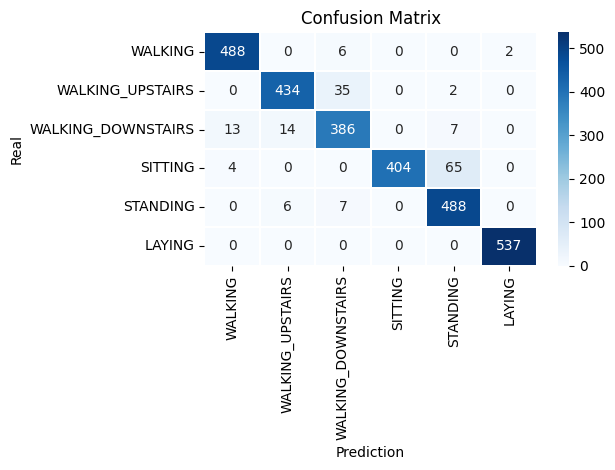

In [27]:
cm = confusion_matrix(real_label, output_label)
plt.figure()
sns.heatmap(data = cm, annot = True, fmt = ".0f", linewidths = 0.1, cmap = "Blues", xticklabels = activity_labels, yticklabels = activity_labels)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [25]:
acc_score = accuracy_score(real_label, output_label)
print(f"Acc Score: {acc_score}")

Acc Score: 0.9444444444444444


In [26]:
clf_report = classification_report(real_label, output_label, target_names = activity_labels)
print(f"Classification Report\n{clf_report}")

Classification Report
                    precision    recall  f1-score   support

           WALKING       0.97      0.98      0.98       496
  WALKING_UPSTAIRS       0.96      0.92      0.94       471
WALKING_DOWNSTAIRS       0.89      0.92      0.90       420
           SITTING       1.00      0.85      0.92       473
          STANDING       0.87      0.97      0.92       501
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.94      2898
         macro avg       0.95      0.94      0.94      2898
      weighted avg       0.95      0.94      0.94      2898

